In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import data

In [3]:
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
df = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
df['target'] = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 

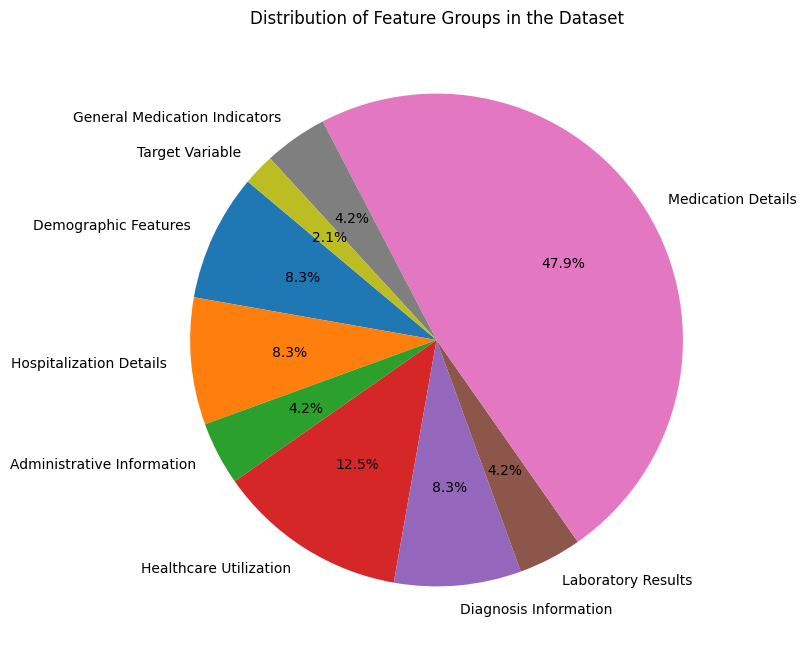

In [8]:
import matplotlib.pyplot as plt

# Define groups and counts
groups = [
    "Demographic Features",
    "Hospitalization Details",
    "Administrative Information",
    "Healthcare Utilization",
    "Diagnosis Information",
    "Laboratory Results",
    "Medication Details",
    "General Medication Indicators",
    "Target Variable"
]

counts = [4, 4, 2, 6, 4, 2, 23, 2, 1]

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts, labels=groups, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Feature Groups in the Dataset")
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

<AxesSubplot:xlabel='target'>

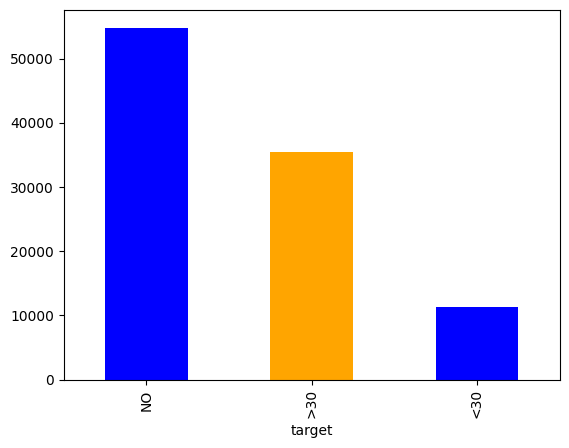

In [25]:
df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])

### Dealing with missing values

In [26]:

def check_nan_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0: 
            print(f"Column '{column}' has {(df[column].isnull().sum()/len(df))*100:.2f}% of  missing values.")

check_nan_values(df)

Column 'race' has 2.23% of  missing values.
Column 'weight' has 96.86% of  missing values.
Column 'payer_code' has 39.56% of  missing values.
Column 'medical_specialty' has 49.08% of  missing values.
Column 'diag_1' has 0.02% of  missing values.
Column 'diag_2' has 0.35% of  missing values.
Column 'diag_3' has 1.40% of  missing values.
Column 'max_glu_serum' has 94.75% of  missing values.
Column 'A1Cresult' has 83.28% of  missing values.


`weight`, `max_glu_serum`, `A1Cresult`, `payer_code`, `medical_specialty` has to be removed from dataset, too many NaN values.

For the other features, we can try to infer missing values using the **mean**, **mode**, or **median**.

In [27]:
columns_to_drop = ['max_glu_serum', 'A1Cresult', 'weight', 'payer_code', 'medical_specialty']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [28]:
check_nan_values(df)

Column 'race' has 2.23% of  missing values.
Column 'diag_1' has 0.02% of  missing values.
Column 'diag_2' has 0.35% of  missing values.
Column 'diag_3' has 1.40% of  missing values.


In [29]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['diag_1'].fillna(df['diag_1'].mode()[0], inplace=True)
df['diag_2'].fillna(df['diag_2'].mode()[0], inplace=True)
df['diag_3'].fillna(df['diag_3'].mode()[0], inplace=True)

In [30]:
check_nan_values(df)

### Check unique values

In [31]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(f"Column '{column}' has {df[column].nunique()} unique values.")

Column 'race' has 5 unique values.
Column 'gender' has 3 unique values.
Column 'age' has 10 unique values.
Column 'diag_1' has 716 unique values.
Column 'diag_2' has 748 unique values.
Column 'diag_3' has 789 unique values.
Column 'metformin' has 4 unique values.
Column 'repaglinide' has 4 unique values.
Column 'nateglinide' has 4 unique values.
Column 'chlorpropamide' has 4 unique values.
Column 'glimepiride' has 4 unique values.
Column 'acetohexamide' has 2 unique values.
Column 'glipizide' has 4 unique values.
Column 'glyburide' has 4 unique values.
Column 'tolbutamide' has 2 unique values.
Column 'pioglitazone' has 4 unique values.
Column 'rosiglitazone' has 4 unique values.
Column 'acarbose' has 4 unique values.
Column 'miglitol' has 4 unique values.
Column 'troglitazone' has 2 unique values.
Column 'tolazamide' has 3 unique values.
Column 'examide' has 1 unique values.
Column 'citoglipton' has 1 unique values.
Column 'insulin' has 4 unique values.
Column 'glyburide-metformin' has

In [32]:
df.drop(columns=['examide'], inplace=True)
df.drop(columns=['citoglipton'], inplace=True)
df.drop(columns=['diag_1','diag_2','diag_3'], axis=1, inplace=True)

### Encode values

In [33]:
def encode_dataset(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        unique_values = df_encoded[col].unique()
        mapping = {val: idx for idx, val in enumerate(unique_values)}
        df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded

In [34]:
def one_hot_encode(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column)
    df = df.drop(column, axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  number_diagnoses          101766 non-null  int64 
 14  metf

In [36]:
df2 = df.copy()
for column in df2.select_dtypes(include='object').columns:
    if column != 'target':
        df2 = one_hot_encode(df2, column)
df2

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,...,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,1,NO,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,True,False
1,1,1,7,3,59,0,18,0,0,0,9,>30,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True
2,1,1,7,2,11,5,13,2,0,1,6,NO,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True
3,1,1,7,2,44,1,16,0,0,0,7,NO,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,5,NO,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,9,>30,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,...,True,False,False,Fa

In [37]:
df = encode_dataset(df2)

<AxesSubplot:xlabel='target'>

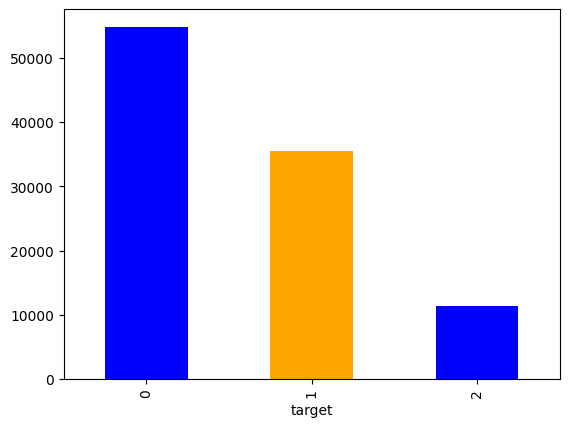

In [38]:
df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])

Readmitted balance:  readmitted
0    0.539119
1    0.460881
Name: proportion, dtype: float64


<AxesSubplot:xlabel='readmitted'>

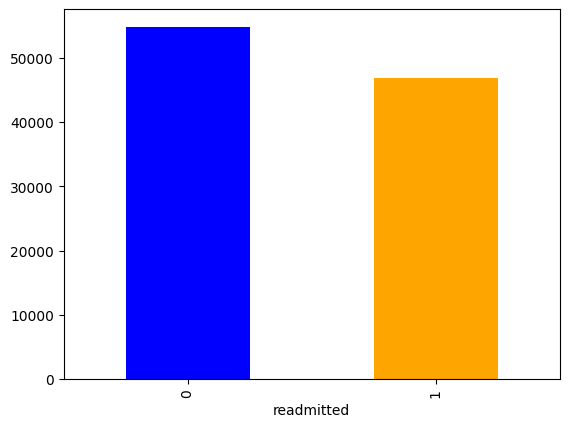

In [39]:
df['readmitted'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
print("Readmitted balance: ",df['readmitted'].value_counts(normalize=True))
df['readmitted'].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [40]:
df.to_csv("data.csv", index=False)
print(f"Data saved to data.csv")

Data saved to data.csv


## Creation of subset

In [ ]:
from sklearn.model_selection import train_test_split
from functions import load_dataset

df = load_dataset("data.csv", target="binary")
df2 = load_dataset("data.csv", target="multi")

# task 1 subset
X,y = df.drop("target", axis=1), df['target']
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)
df = pd.concat([X_subset, y_subset], axis=1)
df.to_csv("subset_task1.csv", index=False)